In [138]:
import pandas as pd 
import sklearn.preprocessing
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [75]:
data=pd.read_pickle('NewData.pkl')

We put the gender information as a boolean feature where it is $0$ if the `MostCommonGender` is a male, and $1$ if it is a female. 

In [80]:
data['MostCommonGender']=data['MostCommonGender'].apply(lambda g: 0 if g=='M' else 1)

In [82]:
data.head()

,N_Transactions,N_Transaction_100,AverageAmount,Average Balance,Utilisation,MostCommonGender,MostFreqLocation,MaxTransaction,MinTransaction,MostFreqTime,...,SexChange,Period,Section,RichPoor,Volatile_Balance,LogCustAccountBalance,Increment,TotalTransactions,Num_Cities,NightTransactions
CustomerID,,,,,,,,,,,,,,,,,,,,,
C1010011,2,2,2553.0,76340.635,73787.635,1,CHENNAI,4750,356,12,...,1,Night,Retired,Poor,0,5.1838,87679.81,5106,2,1
C1010012,1,1,1499.0,24204.490,22705.490,0,MOHALI,1499,1499,20,...,0,Night,Adult,Poor,0,4.3839,0.00,1499,1,0
C1010014,2,2,727.5,100112.950,99385.450,1,DELHI,1205,250,15,...,1,Night,Retired,Rich,0,5.3015,123471.62,1455,2,1
C1010018,1,1,30.0,496.180,466.180,1,GURGAON,30,30,17,...,0,Night,Adult,Poor,0,2.6956,0.00,30,1,0
C1010024,1,1,5000.0,87058.650,82058.650,0,DELHI,5000,5000,14,...,0,Night,Adult,Poor,0,4.9398,0.00,5000,1,0


We define a function to select the features that are numerical:

In [84]:
def no_categorical(df):
    no_object_df = df.select_dtypes(exclude = 'object') 
    return no_object_df

In [85]:
numdata=no_categorical(data)

In [126]:
numdata

,N_Transactions,N_Transaction_100,AverageAmount,Average Balance,Utilisation,MostCommonGender,MaxTransaction,MinTransaction,MostFreqTime,AverageAge,SexChange,Volatile_Balance,LogCustAccountBalance,Increment,TotalTransactions,Num_Cities,NightTransactions
CustomerID,,,,,,,,,,,,,,,,,
C1010011,2,2,2553.0,76340.635,73787.635,1,4750,356,12,66.0,1,0,5.1838,87679.81,5106,2,1
C1010012,1,1,1499.0,24204.490,22705.490,0,1499,1499,20,28.0,0,0,4.3839,0.00,1499,1,0
C1010014,2,2,727.5,100112.950,99385.450,1,1205,250,15,66.0,1,0,5.3015,123471.62,1455,2,1
C1010018,1,1,30.0,496.180,466.180,1,30,30,17,28.0,0,0,2.6956,0.00,30,1,0
C1010024,1,1,5000.0,87058.650,82058.650,0,5000,5000,14,28.0,0,0,4.9398,0.00,5000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C9099832,1,1,590.0,8752.390,8162.390,0,590,590,13,28.0,0,0,3.9421,0.00,590,1,0
C9099836,1,1,691.0,133067.230,132376.230,0,691,691,0,28.0,0,0,5.1241,0.00,691,1,1
C9099877,1,1,222.0,96063.460,95841.460,0,222,222,12,28.0,0,0,4.9826,0.00,222,1,0


In [88]:
numdata.describe()

,N_Transactions,N_Transaction_100,AverageAmount,Average Balance,Utilisation,MostCommonGender,MaxTransaction,MinTransaction,MostFreqTime,AverageAge,SexChange,Volatile_Balance,LogCustAccountBalance,Increment,TotalTransactions,Num_Cities,NightTransactions
count,879357.000000,879357.00000,8.793570e+05,8.793570e+05,8.793570e+05,879357.000000,8.793570e+05,8.793570e+05,879357.000000,879357.000000,879357.000000,879357.000000,879357.000000,8.793570e+05,8.793570e+05,879357.000000,879357.000000
mean,1.184517,1.11345,1.566734e+03,1.147151e+05,1.131484e+05,0.267735,1.777717e+03,1.374435e+03,15.418461,33.347005,0.067482,0.089283,4.208273,6.133945e+02,1.854996e+03,1.173211,0.240144
std,0.448954,0.49441,6.433249e+03,8.010842e+05,8.007328e+05,0.442779,7.107526e+03,6.243189e+03,5.125049,13.243177,0.250855,0.285153,1.088013,5.002734e+05,7.188314e+03,0.431113,0.447040
min,1.000000,0.00000,0.000000e+00,0.000000e+00,-1.517546e+06,0.000000,0.000000e+00,0.000000e+00,0.000000,26.000000,0.000000,0.000000,-2.000000,-8.224243e+07,0.000000e+00,1.000000,0.000000
25%,1.000000,1.00000,1.905000e+02,5.591270e+03,4.753320e+03,0.000000,2.000000e+02,1.300000e+02,12.000000,28.000000,0.000000,0.000000,3.778200,0.000000e+00,2.000000e+02,1.000000,0.000000
50%,1.000000,1.00000,5.000000e+02,1.866578e+04,1.754926e+04,0.000000,5.000000e+02,3.750000e+02,16.000000,28.000000,0.000000,0.000000,4.326700,0.000000e+00,5.330000e+02,1.000000,0.000000
75%,1.000000,1.00000,1.241000e+03,6.154197e+04,5.981068e+04,1.000000,1.408000e+03,1.000000e+03,20.000000,28.000000,0.000000,0.000000,4.867400,0.000000e+00,1.500000e+03,1.000000,0.000000
max,6.000000,6.00000,1.560034e+06,1.150355e+08,1.150339e+08,1.000000,1.560034e+06,1.560034e+06,23.000000,66.000000,1.000000,1.000000,8.216100,1.150344e+08,1.560034e+06,6.000000,4.000000


In [102]:
norm_data=pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(numdata))

In [104]:
norm_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.816407,1.793148,0.153308,-0.047903,-0.049156,1.653793,0.418188,-0.163127,-0.667011,2.465648,3.717352,-0.313108,0.896613,0.174038,0.452263,1.917804,1.699753
1,-0.410992,-0.229465,-0.010529,-0.112985,-0.112950,-0.604671,-0.039214,0.019952,0.893951,-0.403756,-0.269009,-0.313108,0.161420,-0.001226,-0.049524,-0.401776,-0.537187
2,1.816407,1.793148,-0.130453,-0.018228,-0.017188,1.653793,-0.080579,-0.180106,-0.081650,2.465648,3.717352,-0.313108,1.004792,0.245582,-0.055645,1.917804,1.699753
3,-0.410992,-0.229465,-0.238874,-0.142581,-0.140724,1.653793,-0.245897,-0.215344,0.308590,-0.403756,-0.269009,-0.313108,-1.390308,-0.001226,-0.253884,-0.401776,-0.537187
4,-0.410992,-0.229465,0.533676,-0.034524,-0.038827,-0.604671,0.453362,0.580724,-0.276770,-0.403756,-0.269009,-0.313108,0.672351,-0.001226,0.437517,-0.401776,-0.537187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879352,-0.410992,-0.229465,-0.151826,-0.132274,-0.131113,-0.604671,-0.167107,-0.125647,-0.471891,-0.403756,-0.269009,-0.313108,-0.244642,-0.001226,-0.175980,-0.401776,-0.537187
879353,-0.410992,-0.229465,-0.136126,0.022909,0.024013,-0.604671,-0.152897,-0.109469,-3.008453,-0.403756,-0.269009,-0.313108,0.841743,-0.001226,-0.161929,-0.401776,1.699753
879354,-0.410992,-0.229465,-0.209029,-0.023283,-0.021614,-0.604671,-0.218883,-0.184591,-0.667011,-0.403756,-0.269009,-0.313108,0.711689,-0.001226,-0.227174,-0.401776,-0.537187
879355,-0.410992,-0.229465,-0.223951,-0.136260,-0.134520,-0.604671,-0.232390,-0.199968,-0.667011,-0.403756,-0.269009,-0.313108,-0.425706,-0.001226,-0.240529,-0.401776,-0.537187


In [152]:
pca=PCA(n_components=6)
dataPCA=pca.fit_transform(norm_data)
variances=(pca.explained_variance_ratio_)
print(variances)
print(np.sum(pca.explained_variance_ratio_))

[0.26919863 0.22420015 0.12204054 0.06729545 0.06205168 0.05857026]
0.8033566877807617


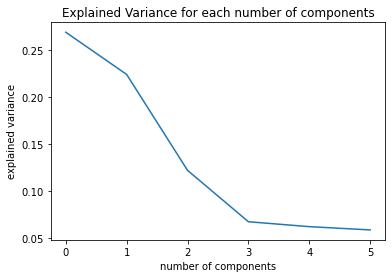

In [153]:
plt.plot(variances)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('Explained Variance for each number of components')
plt.show()

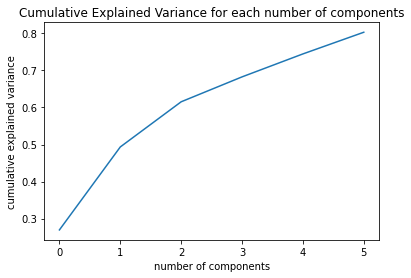

In [154]:
plt.plot(np.cumsum(variances))
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance for each number of components')
plt.show()

Now we are going to define a function `PCA` that takes as inputs:
- X: A numerical matrix
- n: number of components

The idea is to apply the tools of linear algebra seen in the lectures.
- 1: We are going to center our data, so its mean is 0 and the calculations are simplified. Call it Y.
- 2: We compute the covariance matrix of Y.
- 3: We comute its eigen values and vectors and store them in decreasing order.
- 4: Get the first n eigen_vectors into a matrix V
- 5: result=[(V^t)*(Y^t)]^t

Finally, we will put a print within the function that computes the percentae of the variance within the new data.

In [134]:
def myPCA(X,n):
    
    #1
    Y=X-np.mean(X,axis=0)
    
    #2 to get in the required dimensions
    CMat=np.cov(Y,rowvar=False)
    
    #3 (vap: eigen_values or valores propios in spanish || vep: eigen vectors or vectores propios in spanish)
    vap,vep=np.linalg.eig(CMat)
    
    #Store them in the correct order
    sorted_idx = np.argsort(vap)[::-1]
    sorted_vap = vap[sorted_idx]
    sorted_vep = vep[:,sorted_idx]
    
    #4
    V=sorted_vep[:,0:n]
    
    #5
    res=np.dot(V.transpose(),Y.transpose()).transpose()
    
    print('The percentage of Variance that is in the output is:',(np.sum(sorted_vap[:n])/np.sum(sorted_vap))*100,'%.')
    
    return(res,sorted_idx[:n])
    

In [15]:
PCA(np.array(data[['CustAccountBalance','TotalTransactions','Utilisation','MaxTransaction']]),2)

The percentage of Variance that is in the output is: 99.99914744451888 %.


array([[ 145064.1504523 ,   24985.63773998],
       [  80849.45971519,  -34715.47231046],
       [ 145064.1504523 ,   24985.63773998],
       ...,
       [ 207542.1480084 ,  -10041.60556142],
       [ 162152.42036766,   -5645.10154781],
       [-707749.16717914,   25420.16959927]])